<a href="https://colab.research.google.com/github/aiswarya-biju/ESC_CaseStudy/blob/main/ESC_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
import IPython.display as ipd
import librosa
import librosa.display

In [4]:
filename = '/content/drive/MyDrive/Case Study_ESC/archive/fold5/100852-0-0-24.wav'

In [5]:
librosa_audio_data,librosa_sample_rate = librosa.load(filename)

In [6]:
librosa_audio_data

array([-0.00924925, -0.03391963, -0.01134803, ..., -0.20790252,
       -0.18243727, -0.03640924], dtype=float32)

In [7]:
librosa_sample_rate

22050

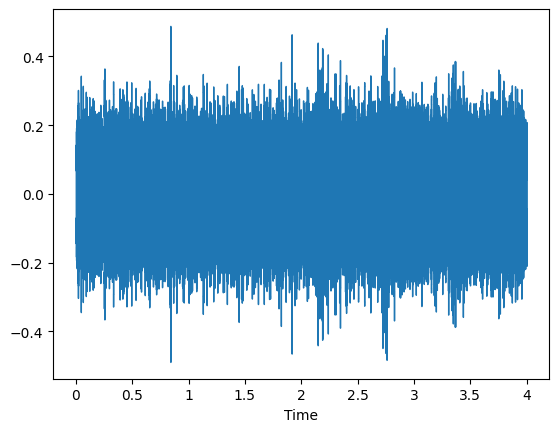

In [8]:
librosa.display.waveshow(librosa_audio_data,sr=librosa_sample_rate)
ipd.Audio(filename)

In [10]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio = wav.read(filename)

In [11]:
wave_audio

array([[ -716,   548],
       [-2058,   -16],
       [-1701,  -525],
       ...,
       [-7184,  -690],
       [-4100,  1751],
       [-1950,  3273]], dtype=int16)

In [12]:
wave_sample_rate

44100

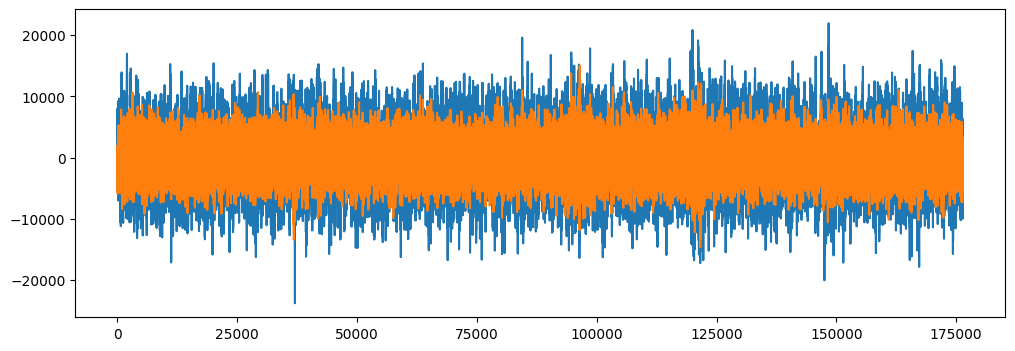

In [13]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)
plt.show()

In [14]:
metadata = pd.read_csv('/content/drive/MyDrive/Case Study_ESC/archive/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [15]:
metadata.shape

(8732, 8)

In [16]:
metadata.isnull().sum()

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [17]:
metadata.duplicated().sum()

0

In [18]:
#check whether the dataset is balanced/imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

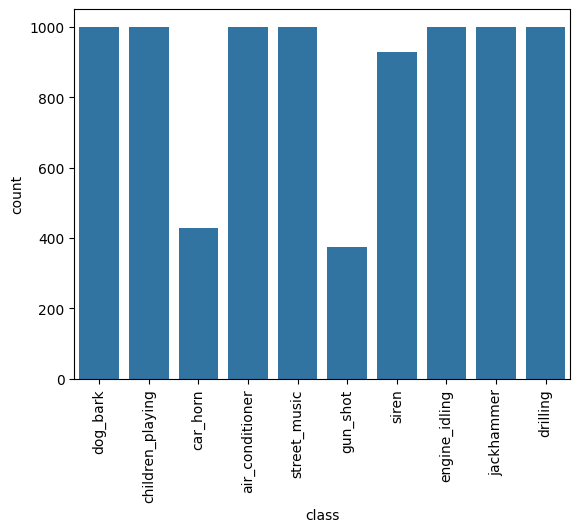

In [19]:
sns.countplot(x='class',data=metadata)
plt.xticks(rotation=90)
plt.show()

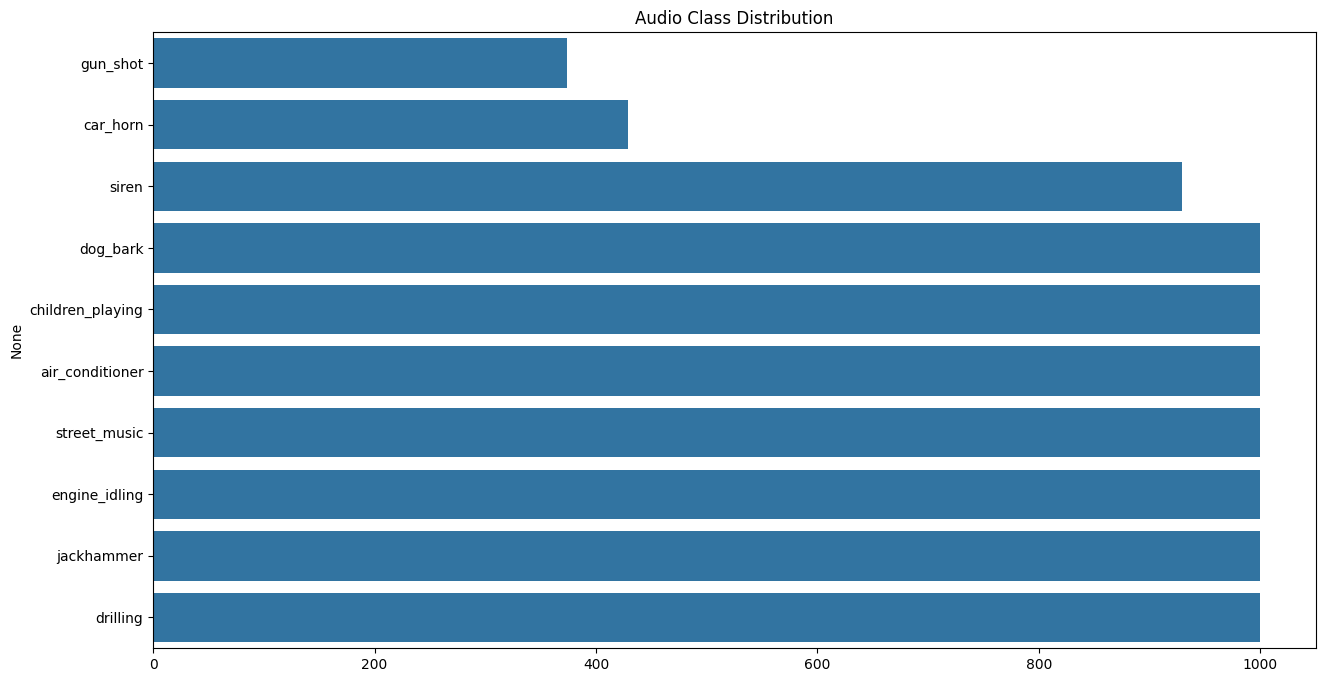

In [20]:
plt.figure(figsize=(15,8))
plt.title('Audio Class Distribution')
class_dist = metadata['class'].value_counts().sort_values()
sns.barplot(x=class_dist.values,
           y=class_dist.keys())
plt.show()

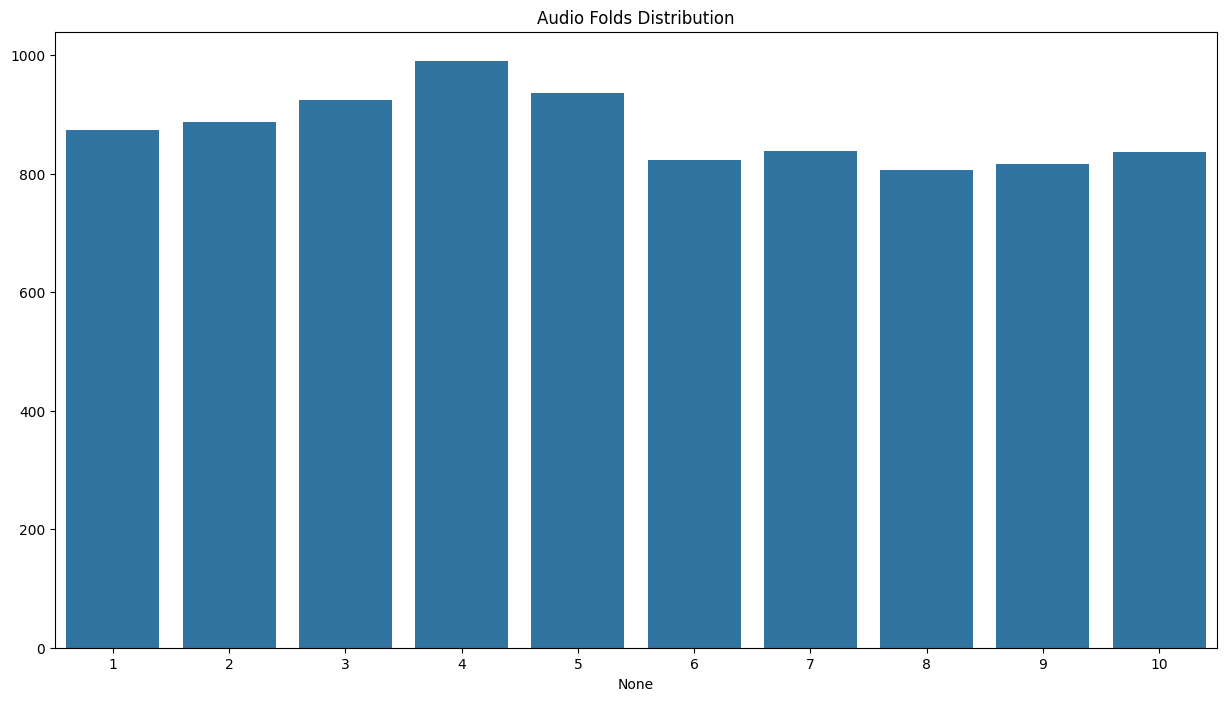

In [21]:
plt.figure(figsize=(15,8))
plt.title('Audio Folds Distribution')
folds_dist = metadata['fold'].value_counts().sort_values()
sns.barplot(y=folds_dist.values,
           x=folds_dist.keys())
plt.show()

In [22]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=50)
mfccs

array([[-91.285095  , -49.2785    , -47.054306  , ..., -50.906086  ,
        -52.75005   , -70.28833   ],
       [ 62.373394  ,  72.160446  ,  73.3779    , ...,  63.376286  ,
         65.38968   ,  64.63338   ],
       [-36.89119   , -27.808048  , -31.262882  , ..., -39.2567    ,
        -41.783714  , -40.556404  ],
       ...,
       [ -2.8631454 ,  -1.4999509 ,  -1.3144895 , ...,  -3.6289601 ,
         -3.2001166 ,  -0.9589349 ],
       [ -4.891677  ,  -5.237199  ,  -3.5814056 , ...,  -3.8117375 ,
         -7.0759697 ,  -4.9002466 ],
       [  2.809935  ,   1.1640427 ,  -0.33048457, ...,  -0.98981786,
         -3.7980115 ,  -3.7981095 ]], dtype=float32)

In [23]:
mfccs.shape

(50, 173)

In [24]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [25]:
audio_dataset_path='/content/drive/MyDrive/Case Study_ESC/archive'

In [26]:
import os
from tqdm import tqdm

In [29]:
### Now we iterate through every audio file and extract features
### using Mel-Frequency Cepstral Coefficients

extracted_features = []

for i, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"]) + '/', str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])


8732it [07:54, 18.42it/s]


In [30]:
#converting extracted features to pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-211.93698, 62.581215, -122.813156, -60.74529...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578075, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658787, 50.690285,...",children_playing


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Data Splitting

In [31]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [32]:
X

array([[-2.11936981e+02,  6.25812149e+01, -1.22813156e+02, ...,
         1.23093772e+00, -5.30414248e+00,  2.22271156e+00],
       [-4.17005188e+02,  9.93366241e+01, -4.29955864e+01, ...,
         1.16269362e+00, -1.96495378e+00,  4.15635616e-01],
       [-4.52393158e+02,  1.12362534e+02, -3.75780754e+01, ...,
         6.01064444e-01, -2.65929937e+00,  7.46222198e-01],
       ...,
       [-2.97315338e+02,  1.02090263e+02, -3.67510796e+01, ...,
         2.20239830e+00,  1.95113873e+00, -3.40594918e-01],
       [-3.36923859e+02,  1.15313904e+02, -4.48470917e+01, ...,
         3.53287309e-01, -1.25762689e+00, -1.70473540e+00],
       [-3.07417633e+02,  8.33067245e+01, -2.57565117e+01, ...,
         4.89573479e+00, -4.30078888e+00, -7.42103004e+00]], dtype=float32)

In [33]:
X.shape

(8732, 50)

In [34]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [35]:
y.shape

(8732,)

Categorical Encoding

In [36]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
X_train.shape

(6985, 50)

In [39]:
X_test.shape

(1747, 50)

In [40]:
y_train.shape

(6985, 10)

In [41]:
y_test.shape

(1747, 10)

In [42]:
print("Number of training samples = ", X_train.shape[0])
print("Number of testing samples = ",X_test.shape[0])

Number of training samples =  6985
Number of testing samples =  1747


Model Building

In [43]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,classification_report

In [45]:
#No of classes
num_labels = y.shape[1]
num_labels

10

In [48]:
model = Sequential()
# first layer
model.add(Dense(256,input_shape=(50,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# second layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#third layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(128))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               13056     
                                                                 
 activation_3 (Activation)   (None, 256)               0         
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 activation_4 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

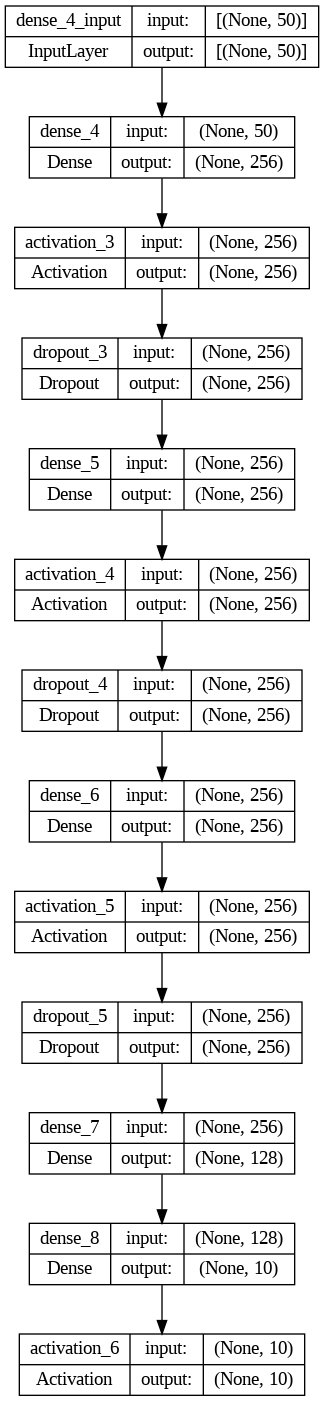

In [50]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [51]:
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam')

Model Training

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 150
num_batch_size = 32

In [53]:
training = model.fit(X_train,
                     y_train,
                     batch_size=num_batch_size,
                     epochs=num_epochs,
                    validation_data=(X_test,y_test))

Epoch 1/150
219/219 [==============================] - 5s 15ms/step - loss: 7.4230 - accuracy: 0.1446 - val_loss: 2.1724 - val_accuracy: 0.1837
Epoch 2/150
219/219 [==============================] - 2s 9ms/step - loss: 2.3211 - accuracy: 0.1894 - val_loss: 2.1556 - val_accuracy: 0.1746
Epoch 3/150
219/219 [==============================] - 2s 8ms/step - loss: 2.1204 - accuracy: 0.2372 - val_loss: 1.9356 - val_accuracy: 0.2639
Epoch 4/150
219/219 [==============================] - 2s 7ms/step - loss: 1.9545 - accuracy: 0.2981 - val_loss: 1.7697 - val_accuracy: 0.3360
Epoch 5/150
219/219 [==============================] - 1s 7ms/step - loss: 1.8571 - accuracy: 0.3300 - val_loss: 1.6580 - val_accuracy: 0.4539
Epoch 6/150
219/219 [==============================] - 2s 8ms/step - loss: 1.7181 - accuracy: 0.3996 - val_loss: 1.5211 - val_accuracy: 0.4957
Epoch 7/150
219/219 [==============================] - 2s 7ms/step - loss: 1.6149 - accuracy: 0.4375 - val_loss: 1.3924 - val_accuracy: 0.555

In [54]:
test_accuracy = model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8872352838516235


In [55]:
train_hist = pd.DataFrame(training.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,7.422968,0.144596,2.172430,0.183744
1,2.321127,0.189406,2.155613,0.174585
2,2.120426,0.237223,1.935622,0.263881
3,1.954454,0.298067,1.769721,0.336005
4,1.857127,0.329993,1.657990,0.453921
...,...,...,...,...
145,0.463086,0.854689,0.365706,0.895821
146,0.482012,0.847530,0.380798,0.891242
147,0.491370,0.849248,0.372604,0.892959
148,0.465837,0.854832,0.405324,0.892959


Text(0.5, 1.0, 'Loss Curves')

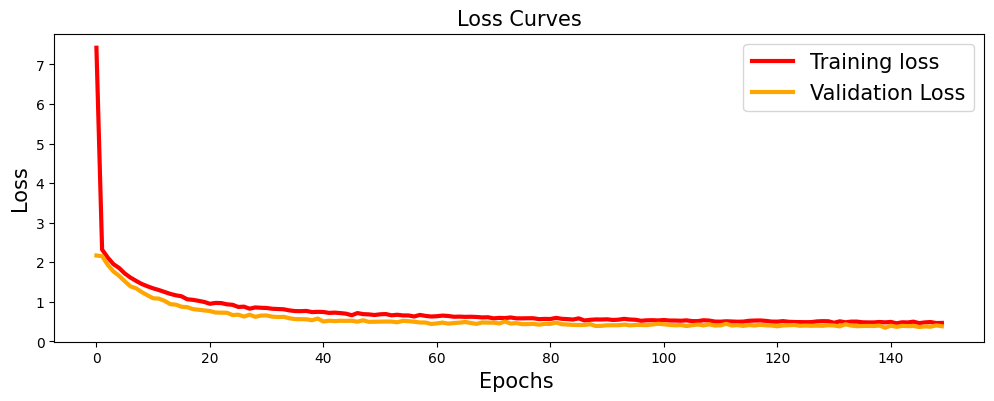

In [56]:
# Loss curves
plt.figure(figsize=[12,4])
plt.plot(training.history['loss'],'red',linewidth=3.0)
plt.plot(training.history['val_loss'],'orange',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=15)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Loss',fontsize=15)
plt.title('Loss Curves',fontsize=15)

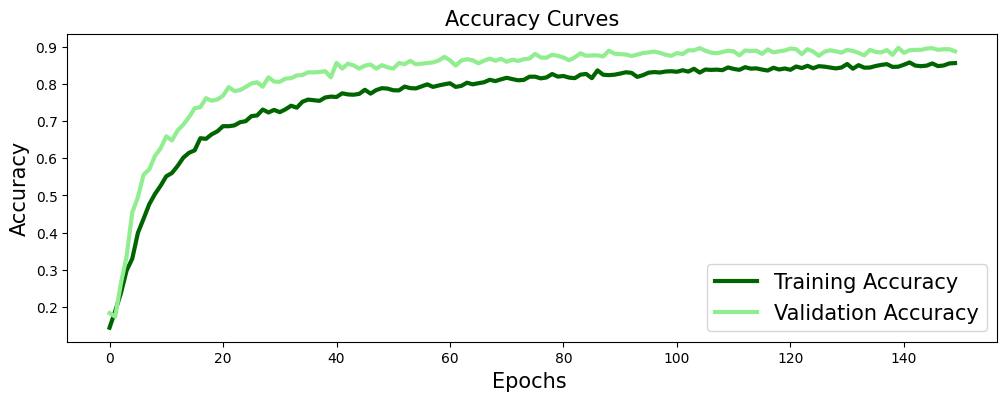

In [57]:
# Accuracy Curves
plt.figure(figsize=[12,4])
plt.plot(training.history['accuracy'],'darkgreen',linewidth=3.0)
plt.plot(training.history['val_accuracy'],'lightgreen',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=15)
plt.xlabel('Epochs ',fontsize=15)
plt.ylabel('Accuracy',fontsize=15)
plt.title('Accuracy Curves',fontsize=15)
plt.show()

In [58]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)

55/55 [==============================] - 0s 4ms/step


In [59]:
from sklearn.metrics import confusion_matrix, classification_report
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))


Confusion Matrix :


[[188   0   8   0   0   5   0   0   0   2]
 [  0  77   0   2   0   1   0   1   1   4]
 [  4   0 164   2   0   4   0   0   3   6]
 [  3   0  14 171   1   1   4   0   4   3]
 [  0   0   8   9 177   1   0   3   0   8]
 [  2   0   4   0   0 186   0   0   0   1]
 [  2   0  10   6   0   0  53   0   1   0]
 [  2   0   2   0   6   0   0 192   0   6]
 [  0   0   3   2   0   1   0   0 159   0]
 [  6   0  29   5   1   5   1   0   0 183]]


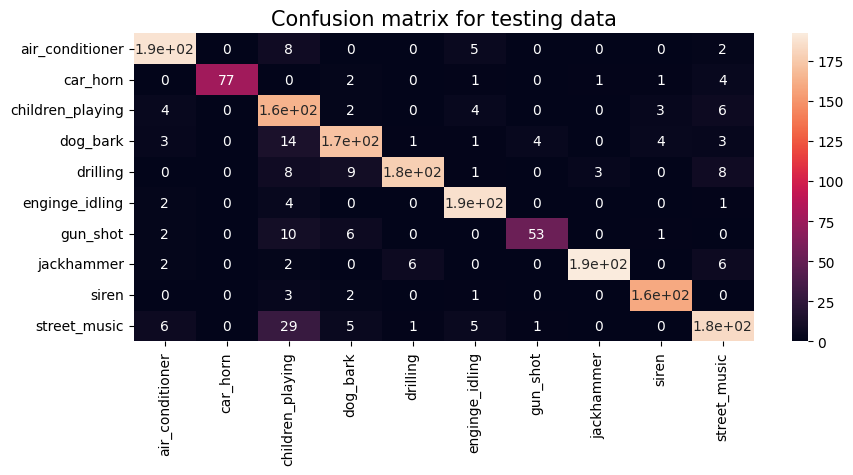

In [61]:
 plt.figure(figsize=(10,4))
plt.title("Confusion matrix for testing data", fontsize = 15)
plt.xlabel("Predicted class")
plt.ylabel("True class")
sns.heatmap(confusion_matrix(ytrue,ypred),annot=True,
           xticklabels = ['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'enginge_idling', 'gun_shot', 'jackhammer', 'siren','street_music'],
           yticklabels=['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'enginge_idling', 'gun_shot', 'jackhammer', 'siren','street_music'])

plt.show()

In [62]:
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))



Classification Report : 

               precision    recall  f1-score   support

           0       0.91      0.93      0.92       203
           1       1.00      0.90      0.94        86
           2       0.68      0.90      0.77       183
           3       0.87      0.85      0.86       201
           4       0.96      0.86      0.91       206
           5       0.91      0.96      0.94       193
           6       0.91      0.74      0.82        72
           7       0.98      0.92      0.95       208
           8       0.95      0.96      0.95       165
           9       0.86      0.80      0.83       230

    accuracy                           0.89      1747
   macro avg       0.90      0.88      0.89      1747
weighted avg       0.90      0.89      0.89      1747



Model Prediction

In [63]:
X_test[1]

array([-8.02253437e+00,  1.12755035e+02, -1.81556683e+01,  2.84234829e+01,
       -1.27770786e+01,  6.17681980e+00, -1.18947344e+01,  7.11439180e+00,
       -8.16670036e+00, -3.77119780e+00, -9.78234673e+00, -6.23640156e+00,
       -9.94229698e+00, -5.95497727e-01, -5.51220751e+00, -1.58082604e+00,
       -6.52468872e+00, -2.72377133e+00, -7.19590044e+00, -4.14205647e+00,
       -4.13311434e+00,  4.09037447e+00, -3.42284489e+00, -2.24278879e+00,
       -7.60056877e+00, -2.73272061e+00, -4.65861702e+00, -5.32068789e-01,
       -5.65531158e+00,  2.36052155e+00,  6.71531391e+00,  8.74744320e+00,
        1.12496786e-01,  1.08901501e+00, -3.02489138e+00, -2.23138499e+00,
       -6.67724323e+00,  1.83605361e+00,  6.97077870e-01,  7.63069630e-01,
       -3.75846457e+00,  2.07469034e+00, -7.11396486e-02, -9.65635255e-02,
       -3.35032201e+00,  7.30996251e-01, -1.88804507e+00,  2.61091590e+00,
       -8.73576283e-01, -1.57231486e+00], dtype=float32)

In [64]:
filename = '/content/drive/MyDrive/Case Study_ESC/archive/fold7/102853-8-0-1.wav'
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1,-1)
np.argmax(model.predict(prediction_feature),axis=1)

1/1 [==============================] - 0s 37ms/step


array([1])

In [65]:
prediction_feature.shape

(1, 50)

In [66]:
np.argmax(model.predict(X_test),axis=1)

55/55 [==============================] - 0s 4ms/step


array([8, 9, 4, ..., 5, 4, 8])

Testing some test audio data

In [67]:
filename = "/content/drive/MyDrive/Case Study_ESC/archive/fold7/164797-2-0-8.wav"
audio,sample_rate = librosa.load(filename)
mfccs_features = librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=50)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

In [68]:
mfccs_scaled_features

array([-3.67599640e+02,  1.62265381e+02,  2.21948929e+01,  2.53145695e+01,
        1.23516815e-02,  2.60733261e+01,  7.34796762e+00,  1.10020885e+01,
        2.82836604e+00,  7.89179325e+00,  3.92894387e+00,  1.00492263e+00,
       -3.58165312e+00,  1.65336740e+00,  2.66574860e+00,  4.73407936e+00,
       -1.35527980e+00, -4.23158318e-01,  1.50969899e+00,  4.17796946e+00,
       -7.38798559e-01,  9.91302431e-01, -1.29984045e+00,  2.46500611e+00,
        7.53907382e-01,  1.09631419e-01, -6.48119748e-02,  7.66478539e-01,
       -1.05782159e-01,  8.92450035e-01, -3.61038953e-01,  2.35642731e-01,
       -5.51004946e-01,  1.01078534e+00, -1.36290538e+00,  1.13013141e-01,
       -4.71781462e-01,  6.52940452e-01, -1.43847317e-01,  2.44279549e-01,
       -3.10972482e-01,  1.27162826e+00, -8.07774127e-01,  7.75951147e-01,
        8.02690268e-01,  1.36880195e+00,  1.35307372e-01,  5.30868411e-01,
        8.69995058e-02,  1.49851906e+00], dtype=float32)

In [69]:
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
mfccs_scaled_features

array([[-3.67599640e+02,  1.62265381e+02,  2.21948929e+01,
         2.53145695e+01,  1.23516815e-02,  2.60733261e+01,
         7.34796762e+00,  1.10020885e+01,  2.82836604e+00,
         7.89179325e+00,  3.92894387e+00,  1.00492263e+00,
        -3.58165312e+00,  1.65336740e+00,  2.66574860e+00,
         4.73407936e+00, -1.35527980e+00, -4.23158318e-01,
         1.50969899e+00,  4.17796946e+00, -7.38798559e-01,
         9.91302431e-01, -1.29984045e+00,  2.46500611e+00,
         7.53907382e-01,  1.09631419e-01, -6.48119748e-02,
         7.66478539e-01, -1.05782159e-01,  8.92450035e-01,
        -3.61038953e-01,  2.35642731e-01, -5.51004946e-01,
         1.01078534e+00, -1.36290538e+00,  1.13013141e-01,
        -4.71781462e-01,  6.52940452e-01, -1.43847317e-01,
         2.44279549e-01, -3.10972482e-01,  1.27162826e+00,
        -8.07774127e-01,  7.75951147e-01,  8.02690268e-01,
         1.36880195e+00,  1.35307372e-01,  5.30868411e-01,
         8.69995058e-02,  1.49851906e+00]], dtype=float3

In [70]:
mfccs_scaled_features.shape

(1, 50)

In [71]:
predicted_label = np.argmax(model.predict(mfccs_scaled_features),axis=1)
predicted_label

1/1 [==============================] - 0s 40ms/step


array([2])

In [72]:
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

array(['children_playing'], dtype='<U16')

In [73]:
ipd.Audio(filename)

In [74]:
def predict(path):
    audio, sample_rate = librosa.load(filename)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=50)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
    predicted_label = np.argmax(model.predict(mfccs_scaled_features),axis=1)
    prediction_class = labelencoder.inverse_transform(predicted_label)
    print(prediction_class)
    return ipd.Audio(path)

In [75]:
predict('/content/drive/MyDrive/Case Study_ESC/archive/fold7/164797-2-0-8.wav')

1/1 [==============================] - 0s 252ms/step
['children_playing']
